In [1]:
!pip install pandas plotnine

In [2]:
from plotnine import *

In [3]:
# Import libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns




from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [4]:
import pandas_profiling as ppf

In [5]:
# supress warnings from plotnine

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
df1 = pd.read_csv("df.csv")
df1.head()

ID GENDER Car Property  Children    Income                   Job  \
0  5008804      M   Y        Y         0  427500.0               Working   
1  5008805      M   Y        Y         0  427500.0               Working   
2  5008806      M   Y        Y         0  112500.0               Working   
3  5008808      F   N        Y         0  270000.0  Commercial associate   
4  5008809      F   N        Y         0  270000.0  Commercial associate   

                       Education        Martial_Status            Housing  \
0               Higher education        Civil marriage   Rented apartment   
1               Higher education        Civil marriage   Rented apartment   
2  Secondary / secondary special               Married  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

     Age  Employed      Occupation  Family_Size  STATUS  
0 -12005     -4542      Not Listed            2       0  
1 -12005     -4542      Not Listed            2       0  
2 -21474     -1134  Security staff            2       0  
3 -19110     -3051     Sales staff            1       0  
4 -19110     -3051     Sales staff            1       0

In [7]:
df1

ID GENDER Car Property  Children    Income                   Job  \
0      5008804      M   Y        Y         0  427500.0               Working   
1      5008805      M   Y        Y         0  427500.0               Working   
2      5008806      M   Y        Y         0  112500.0               Working   
3      5008808      F   N        Y         0  270000.0  Commercial associate   
4      5008809      F   N        Y         0  270000.0  Commercial associate   
...        ...    ...  ..      ...       ...       ...                   ...   
36452  5149828      M   Y        Y         0  315000.0               Working   
36453  5149834      F   N        Y         0  157500.0  Commercial associate   
36454  5149838      F   N        Y         0  157500.0             Pensioner   
36455  5150049      F   N        Y         0  283500.0               Working   
36456  5150337      M   N        Y         0  112500.0               Working   

                           Education        Martial_Status            Housing  \
0                   Higher education        Civil marriage   Rented apartment   
1                   Higher education        Civil marriage   Rented apartment   
2      Secondary / secondary special               Married  House / apartment   
3      Secondary / secondary special  Single / not married  House / apartment   
4      Secondary / secondary special  Single / not married  House / apartment   
...                              ...                   ...                ...   
36452  Secondary / secondary special               Married  House / apartment   
36453               Higher education               Married  House / apartment   
36454               Higher education               Married  House / apartment   
36455  Secondary / secondary special               Married  House / apartment   
36456  Secondary / secondary special  Single / not married   Rented apartment   

         Age  Employed      Occupation  Family_Size  STATUS  
0     -12005     -4542      Not Listed            2       0  
1     -12005     -4542      Not Listed            2       0  
2     -21474     -1134  Security staff            2       0  
3     -19110     -3051     Sales staff            1       0  
4     -19110     -3051     Sales staff            1       0  
...      ...       ...             ...          ...     ...  
36452 -17348     -2420        Managers            2       1  
36453 -12387     -1325  Medicine staff            2       1  
36454 -12387     -1325  Medicine staff            2       1  
36455 -17958      -655     Sales staff            2       1  
36456  -9188     -1193        Laborers            1       1  

[36457 rows x 15 columns]

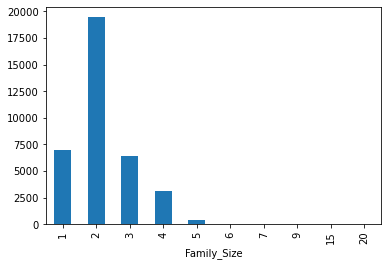

In [8]:
# family member count

df1.groupby('Family_Size').Family_Size.count().plot.bar(ylim=0)
plt.show()

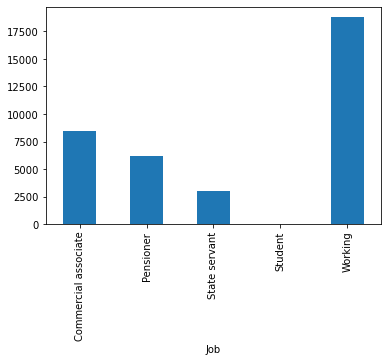

In [9]:
# show graph of type of jobs

df1.groupby('Job').Job.count().plot.bar(ylim=0)
plt.show()

In [10]:
# working category has most. (basically 'other')
# commerercial associate next

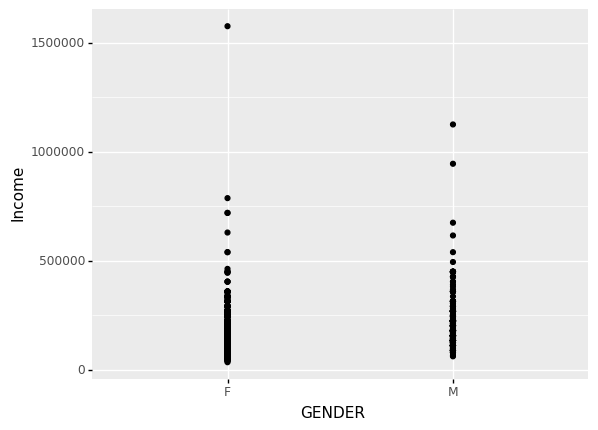

<ggplot: (8772672087462)>

In [11]:
# ggplot male and female per income

ggplot(df1.sample(1000), aes(x = 'GENDER', y = 'Income'))+ geom_point()

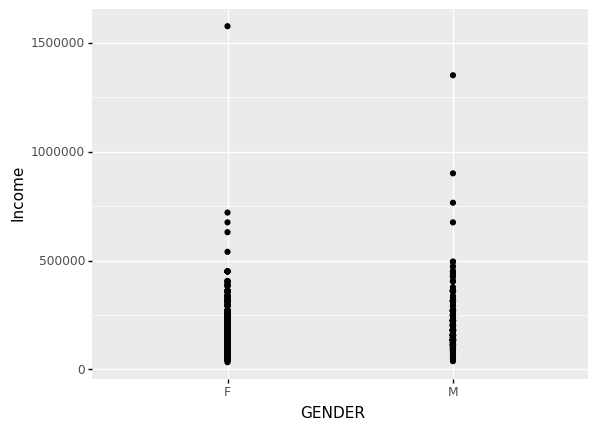

<ggplot: (8772669897981)>

In [12]:
# add a mean line for above

ggplot(df1.sample(1000), aes(x = 'GENDER', y = 'Income'))+ geom_point() + stat_smooth()

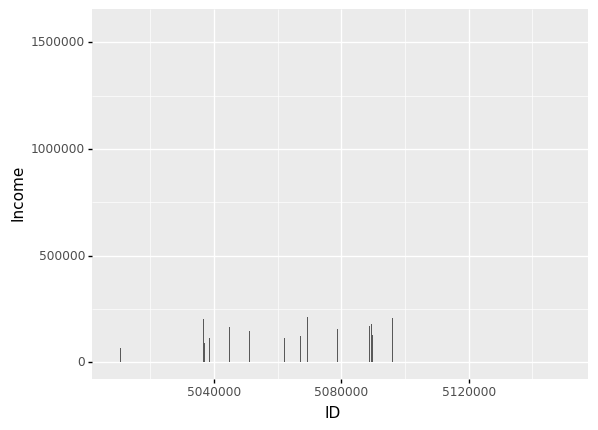

<ggplot: (8772670166351)>

In [13]:
# family size

ggplot(df1.sample(5000), aes(x = 'ID', y = 'Income')) + geom_bar(stat = 'identity')

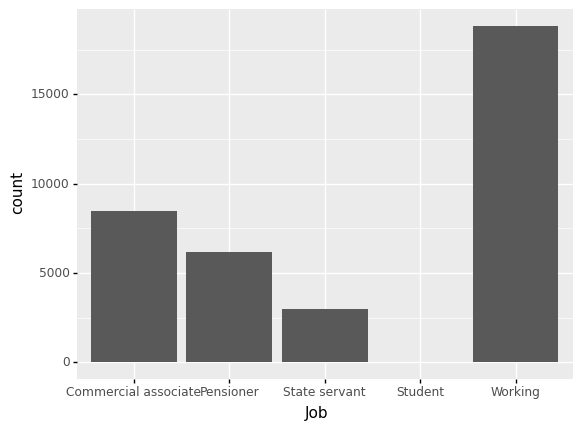

<ggplot: (8772670693413)>

In [14]:
ggplot(df1, aes(x='Job')) + \
    geom_bar(stat = 'count')

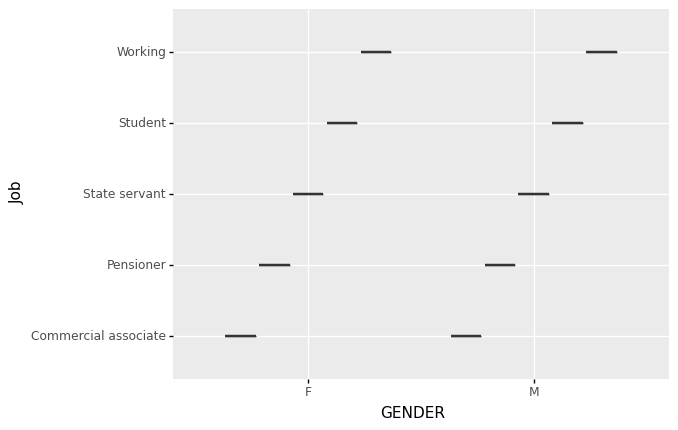

<ggplot: (8772670745522)>

In [15]:
ggplot(df1, aes(x='GENDER', y='Job')) + \
    geom_boxplot()

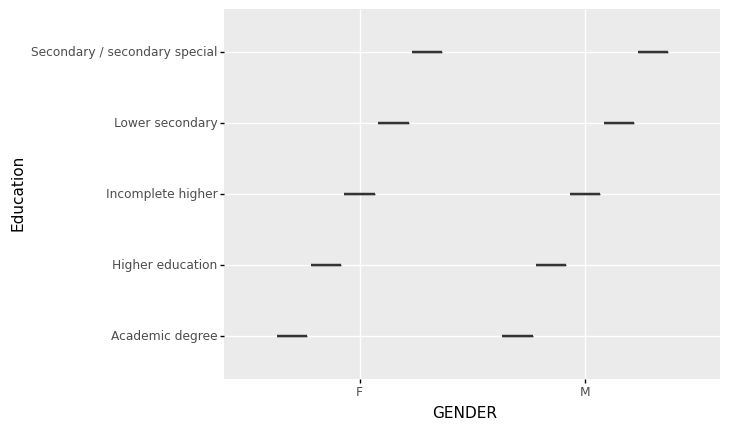

<ggplot: (8772672081604)>

In [16]:
ggplot(df1, aes(x='GENDER', y='Education')) + \
    geom_boxplot()

<AxesSubplot:ylabel='Car'>

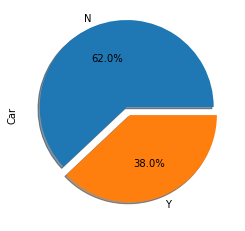

In [17]:
# how many own a car

df1['Car'].value_counts().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')

<AxesSubplot:ylabel='GENDER'>

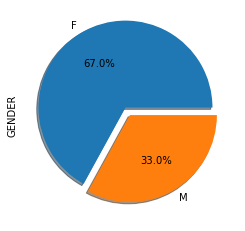

In [18]:
# gender of applicants 

df1['GENDER'].value_counts().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')

<AxesSubplot:xlabel='Education'>

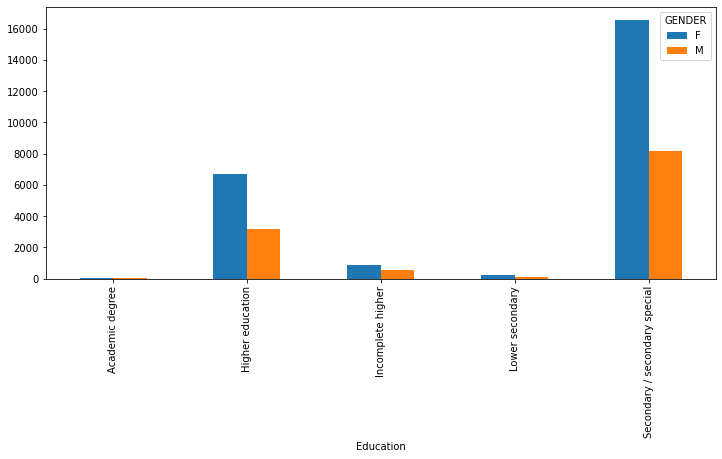

In [19]:
# gender per education and children

g = df1.pivot_table(index='Education', columns='GENDER', values=['Children'], aggfunc='size')

g.plot(kind='bar', figsize=(12, 5))

<AxesSubplot:ylabel='GENDER,Education'>

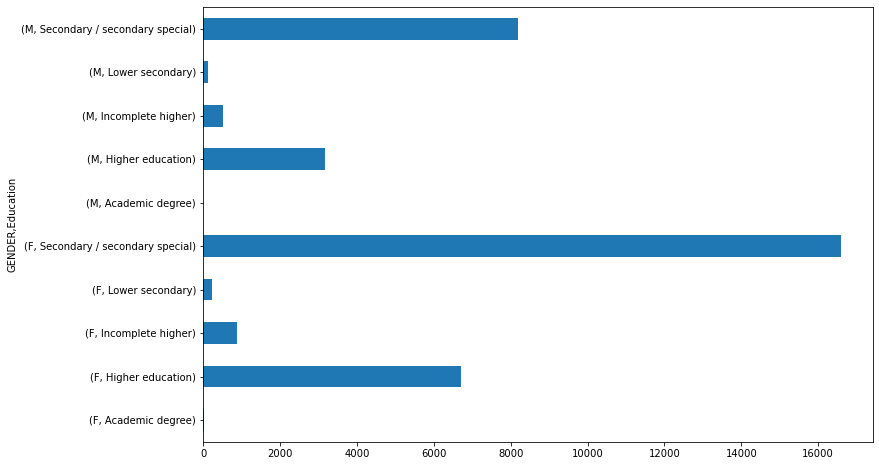

In [20]:
# groupby gender and education

df1.groupby(['GENDER', 'Education']).size().plot(kind='barh', figsize = (12, 8))

<AxesSubplot:ylabel='GENDER,Job'>

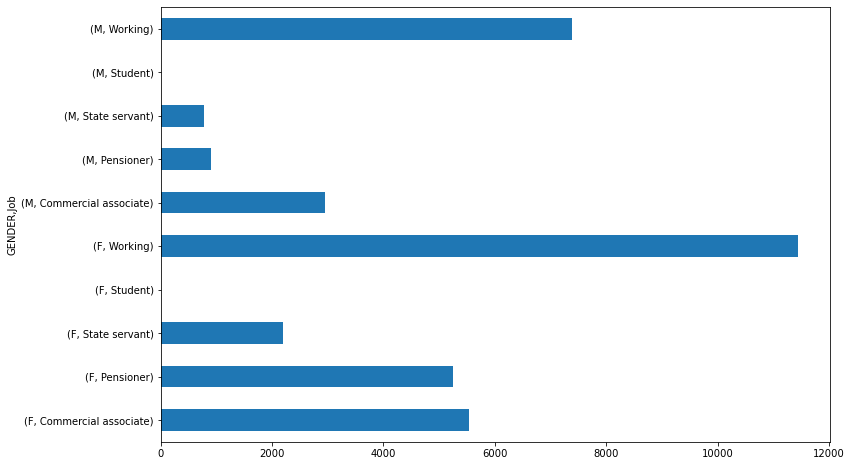

In [21]:
# grouby by gender and job

df1.groupby(['GENDER', 'Job']).size().plot(kind='barh', figsize = (12, 8))

In [23]:
df1_norm_profile = ppf.ProfileReport(df1)

In [24]:
df1_norm_profile

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]